<a href="https://colab.research.google.com/github/Liso15/Projects/blob/main/covid_za.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#labries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get data


def GetData(filename):
    return pd.read_csv(filename, index_col=[0])

In [ ]:
cz = GetData('covid19za_provincial_cumulative_timeline_confirmed.csv')
cz

,YYYYMMDD,EC,FS,GP,KZN,LP,MP,NC,NW,WC,UNKNOWN,total,source
date,,,,,,,,,,,,,
05-03-2020,20200305,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
07-03-2020,20200307,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,NaN
08-03-2020,20200308,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3,NaN
09-03-2020,20200309,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,7,NaN
11-03-2020,20200311,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
05-07-2020,20200705,35648.0,2553.0,63404.0,15146.0,1706.0,1965.0,734.0,6063.0,69531.0,0.0,196750,https://twitter.com/nicd_sa/status/12798466117...
06-07-2020,20200706,38081.0,2804.0,66891.0,15819.0,1785.0,2173.0,820.0,6410.0,70938.0,0.0,205721,https://twitter.com/COVID_19_ZA/status/1280252...
07-07-2020,20200707,40401.0,3034.0,71488.0,16743.0,1950.0,2353.0,888.0,6842.0,72156.0,0.0,215855,https://twitter.com/nicd_sa/status/12806201056...


DATA cleaning and transformation

In [ ]:
# delect columns we dont need
cz.drop(columns=['YYYYMMDD','UNKNOWN','source'], inplace=True)
cz

,EC,FS,GP,KZN,LP,MP,NC,NW,WC,total
date,,,,,,,,,,
05-03-2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
07-03-2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
08-03-2020,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
09-03-2020,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,7
11-03-2020,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...
05-07-2020,35648.0,2553.0,63404.0,15146.0,1706.0,1965.0,734.0,6063.0,69531.0,196750
06-07-2020,38081.0,2804.0,66891.0,15819.0,1785.0,2173.0,820.0,6410.0,70938.0,205721
07-07-2020,40401.0,3034.0,71488.0,16743.0,1950.0,2353.0,888.0,6842.0,72156.0,215855


In [ ]:
cz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 05-03-2020 to 09-07-2020
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EC      123 non-null    float64
 1   FS      123 non-null    float64
 2   GP      123 non-null    float64
 3   KZN     123 non-null    float64
 4   LP      123 non-null    float64
 5   MP      123 non-null    float64
 6   NC      123 non-null    float64
 7   NW      123 non-null    float64
 8   WC      123 non-null    float64
 9   total   125 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 10.7+ KB


In [ ]:
cz.duplicated()
cz.drop_duplicates()

,EC,FS,GP,KZN,LP,MP,NC,NW,WC,total
date,,,,,,,,,,
05-03-2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
07-03-2020,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2
08-03-2020,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,3
09-03-2020,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,7
11-03-2020,0.0,0.0,5.0,7.0,0.0,0.0,0.0,0.0,1.0,13
...,...,...,...,...,...,...,...,...,...,...
05-07-2020,35648.0,2553.0,63404.0,15146.0,1706.0,1965.0,734.0,6063.0,69531.0,196750
06-07-2020,38081.0,2804.0,66891.0,15819.0,1785.0,2173.0,820.0,6410.0,70938.0,205721
07-07-2020,40401.0,3034.0,71488.0,16743.0,1950.0,2353.0,888.0,6842.0,72156.0,215855


EDA

Palette

In [ ]:
palette = ['#367C6E', '#EECD69', '#F3AC59', '#95AC41', '#E56F3E']

Univariate analysis-swarm plot

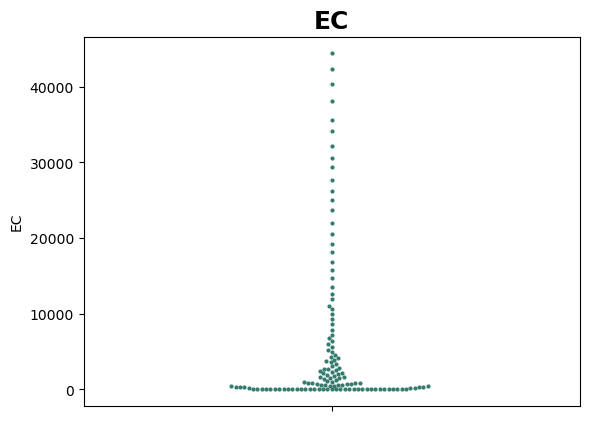

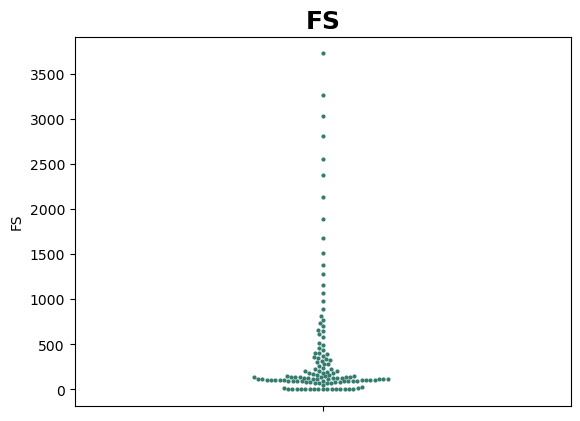

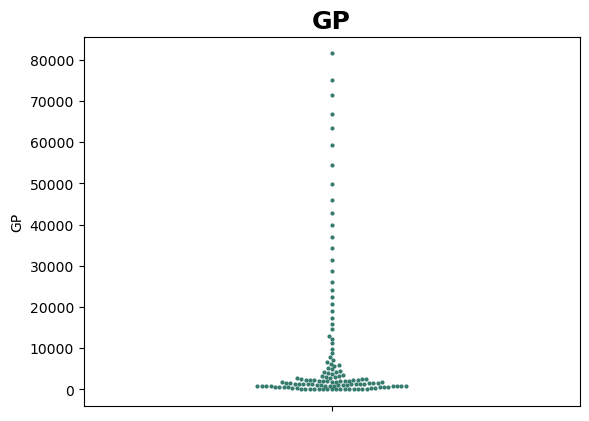

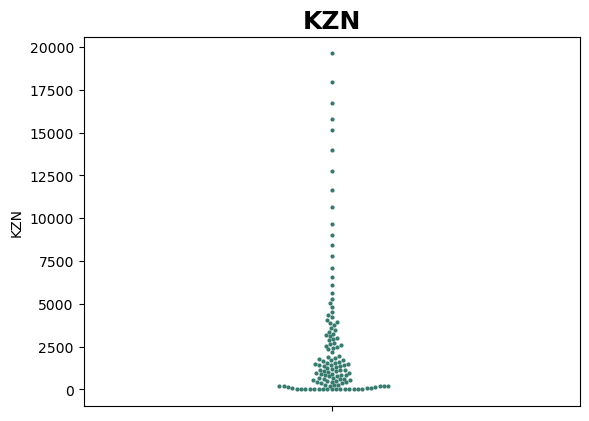

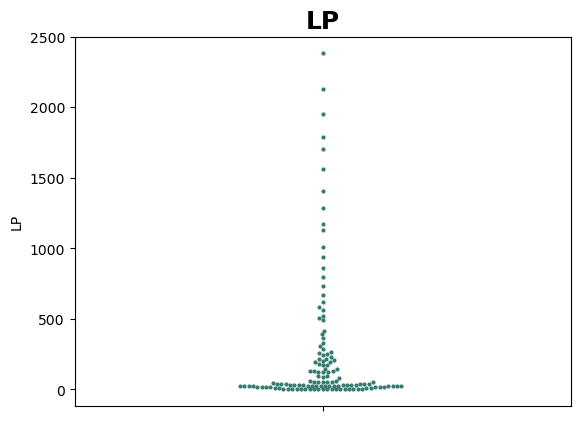

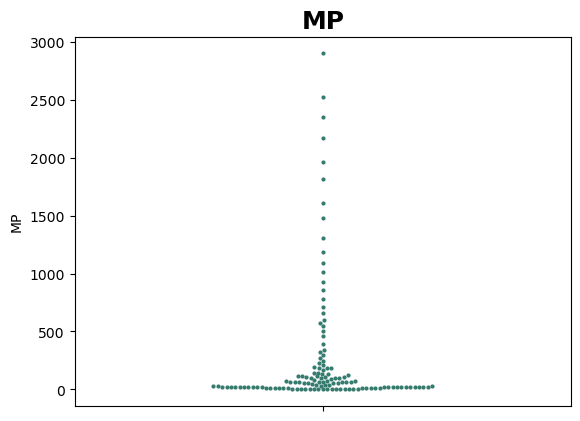

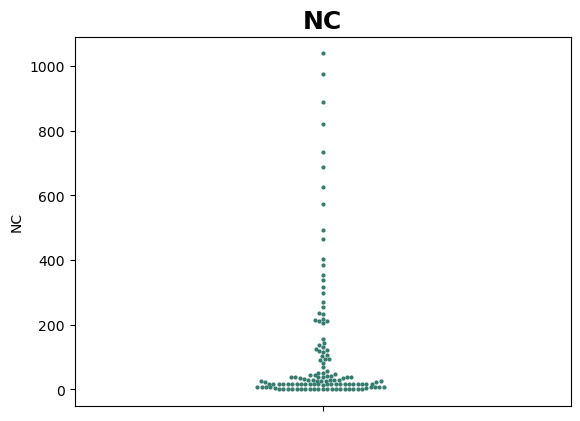

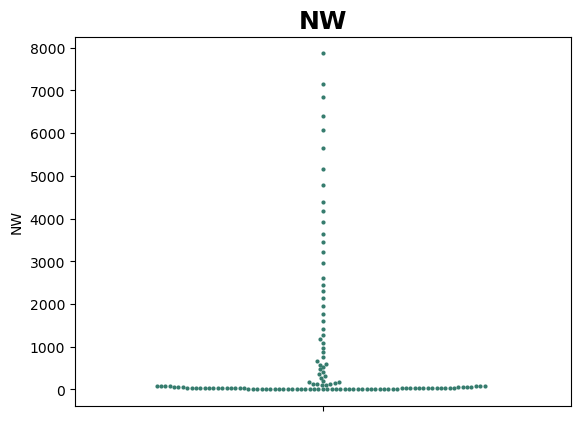

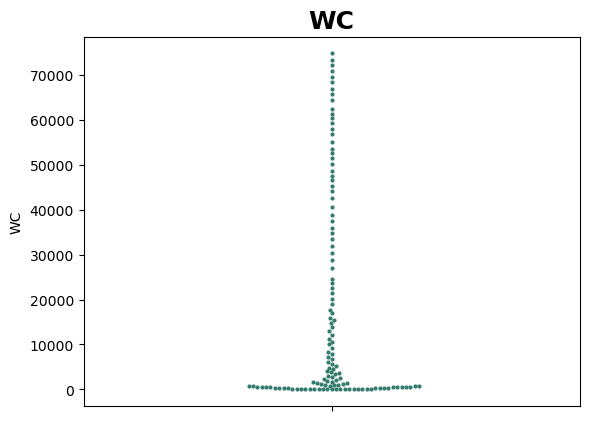

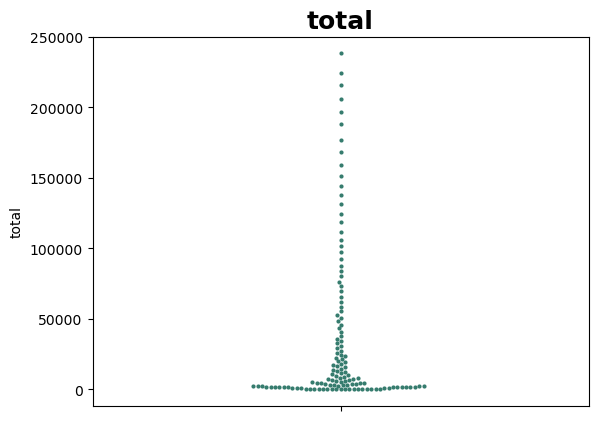

In [ ]:
for za in cz.columns:
 sns.swarmplot(data=cz, y= za, s= 3, color= palette[0])
 plt.title(za , fontsize= 18, fontweight= 'bold')
 plt.show()

Univariate analysis- voilin plot

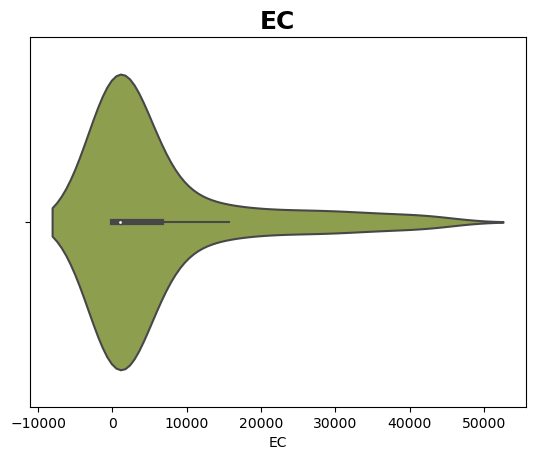

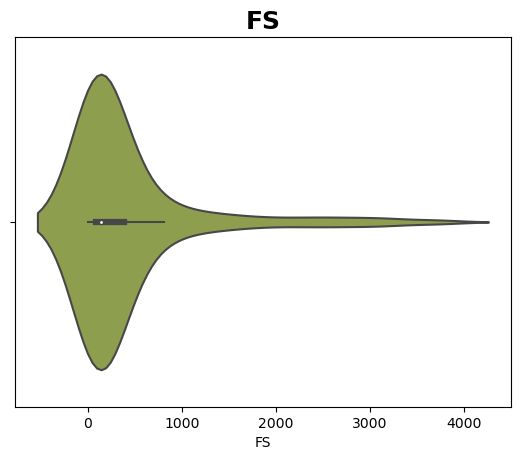

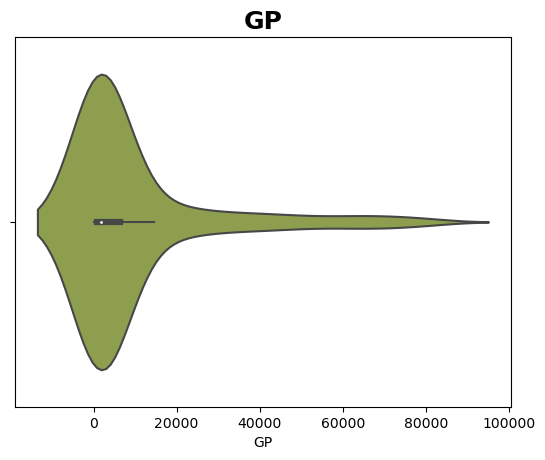

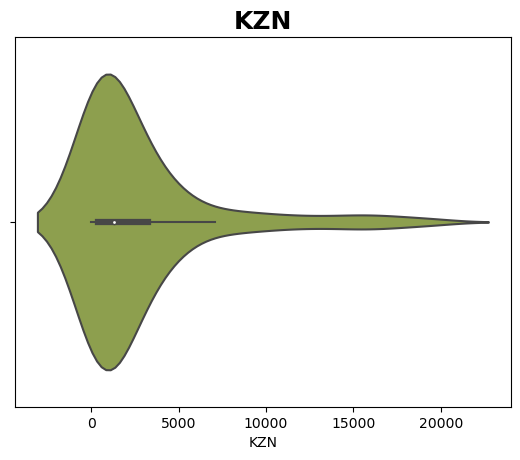

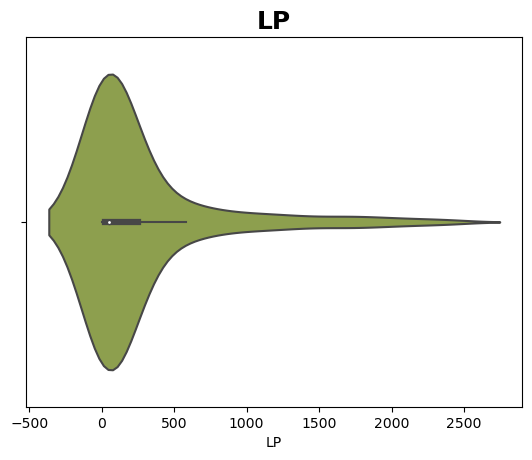

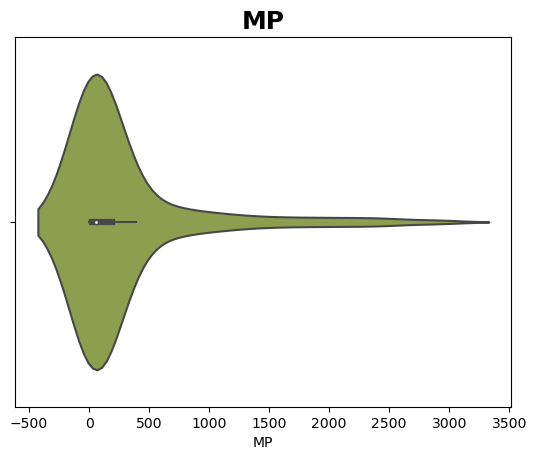

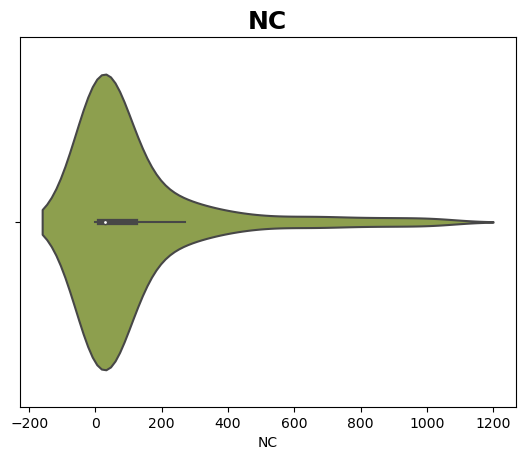

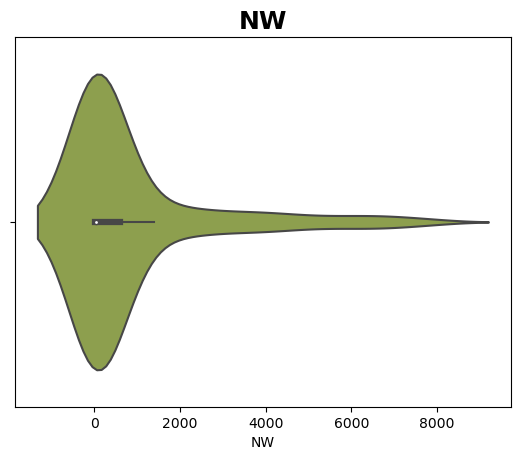

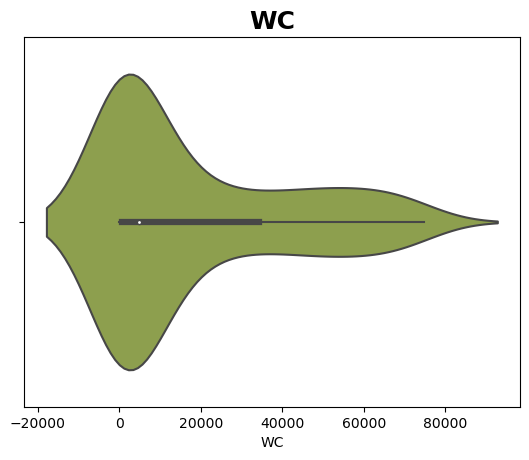

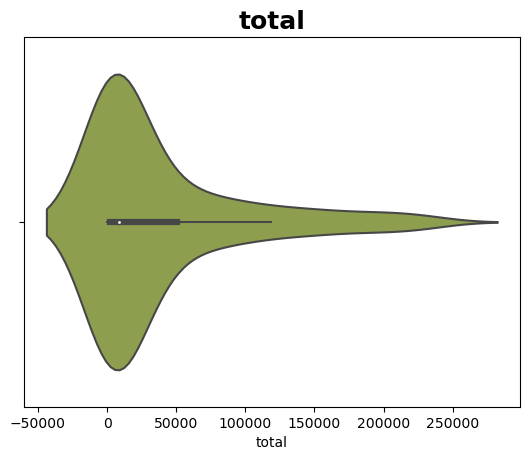

In [ ]:
for za in cz.columns:
    sns.violinplot (data= cz, x= za, showfliers=False,color=palette[3])
    plt.title(za , fontsize=18, fontweight='bold')
    plt.show()

OBSERVATIONS
. Eastern Cape had accumlation of deaths between negative 10000 and 10000 region. A long tail of deaths to date @50000
. Free State below 1000 deaths and total deaths todate accumlation is 4000. among the lowest deaths per province
. Gautange accumlation of deaths per data entry around 20000, while deaths todate is close to 100000.
. KwaZuluNatal the most populas province in South Africa, data accumlation is below 5000. deaths todate is over 20000. its safe to conclude that covid deaths are not correlated to population.
. limpopo experanced a negative entry of deaths with covid of 500 and death todate 2500
. Mpumalanga experanced a negative entry of deaths with covid of 500 and death todate of 3500 respectivily.
. Northern Cape experianced a negative of 200 entries of death data and total death todate is 1200 the lowest death rate in the country. chances of covid recovery and mortality is Northern Cape.
. Northwest with below 2000 data accumaltion of covid deaths and over 8000 deaths todate.
. Western Cape with 20000 of data entry without death and death accumlation todate of over 80000. The second largest deaths as per our data metrics.
. Total deaths are over 250000 todate  while covid mortality is expected to be 50000. 
more data will be needed.

Bivariate Analysis

In [ ]:
cz.columns

Index(['EC', 'FS', 'GP', 'KZN', 'LP', 'MP', 'NC', 'NW', 'WC', 'total'], dtype='object')

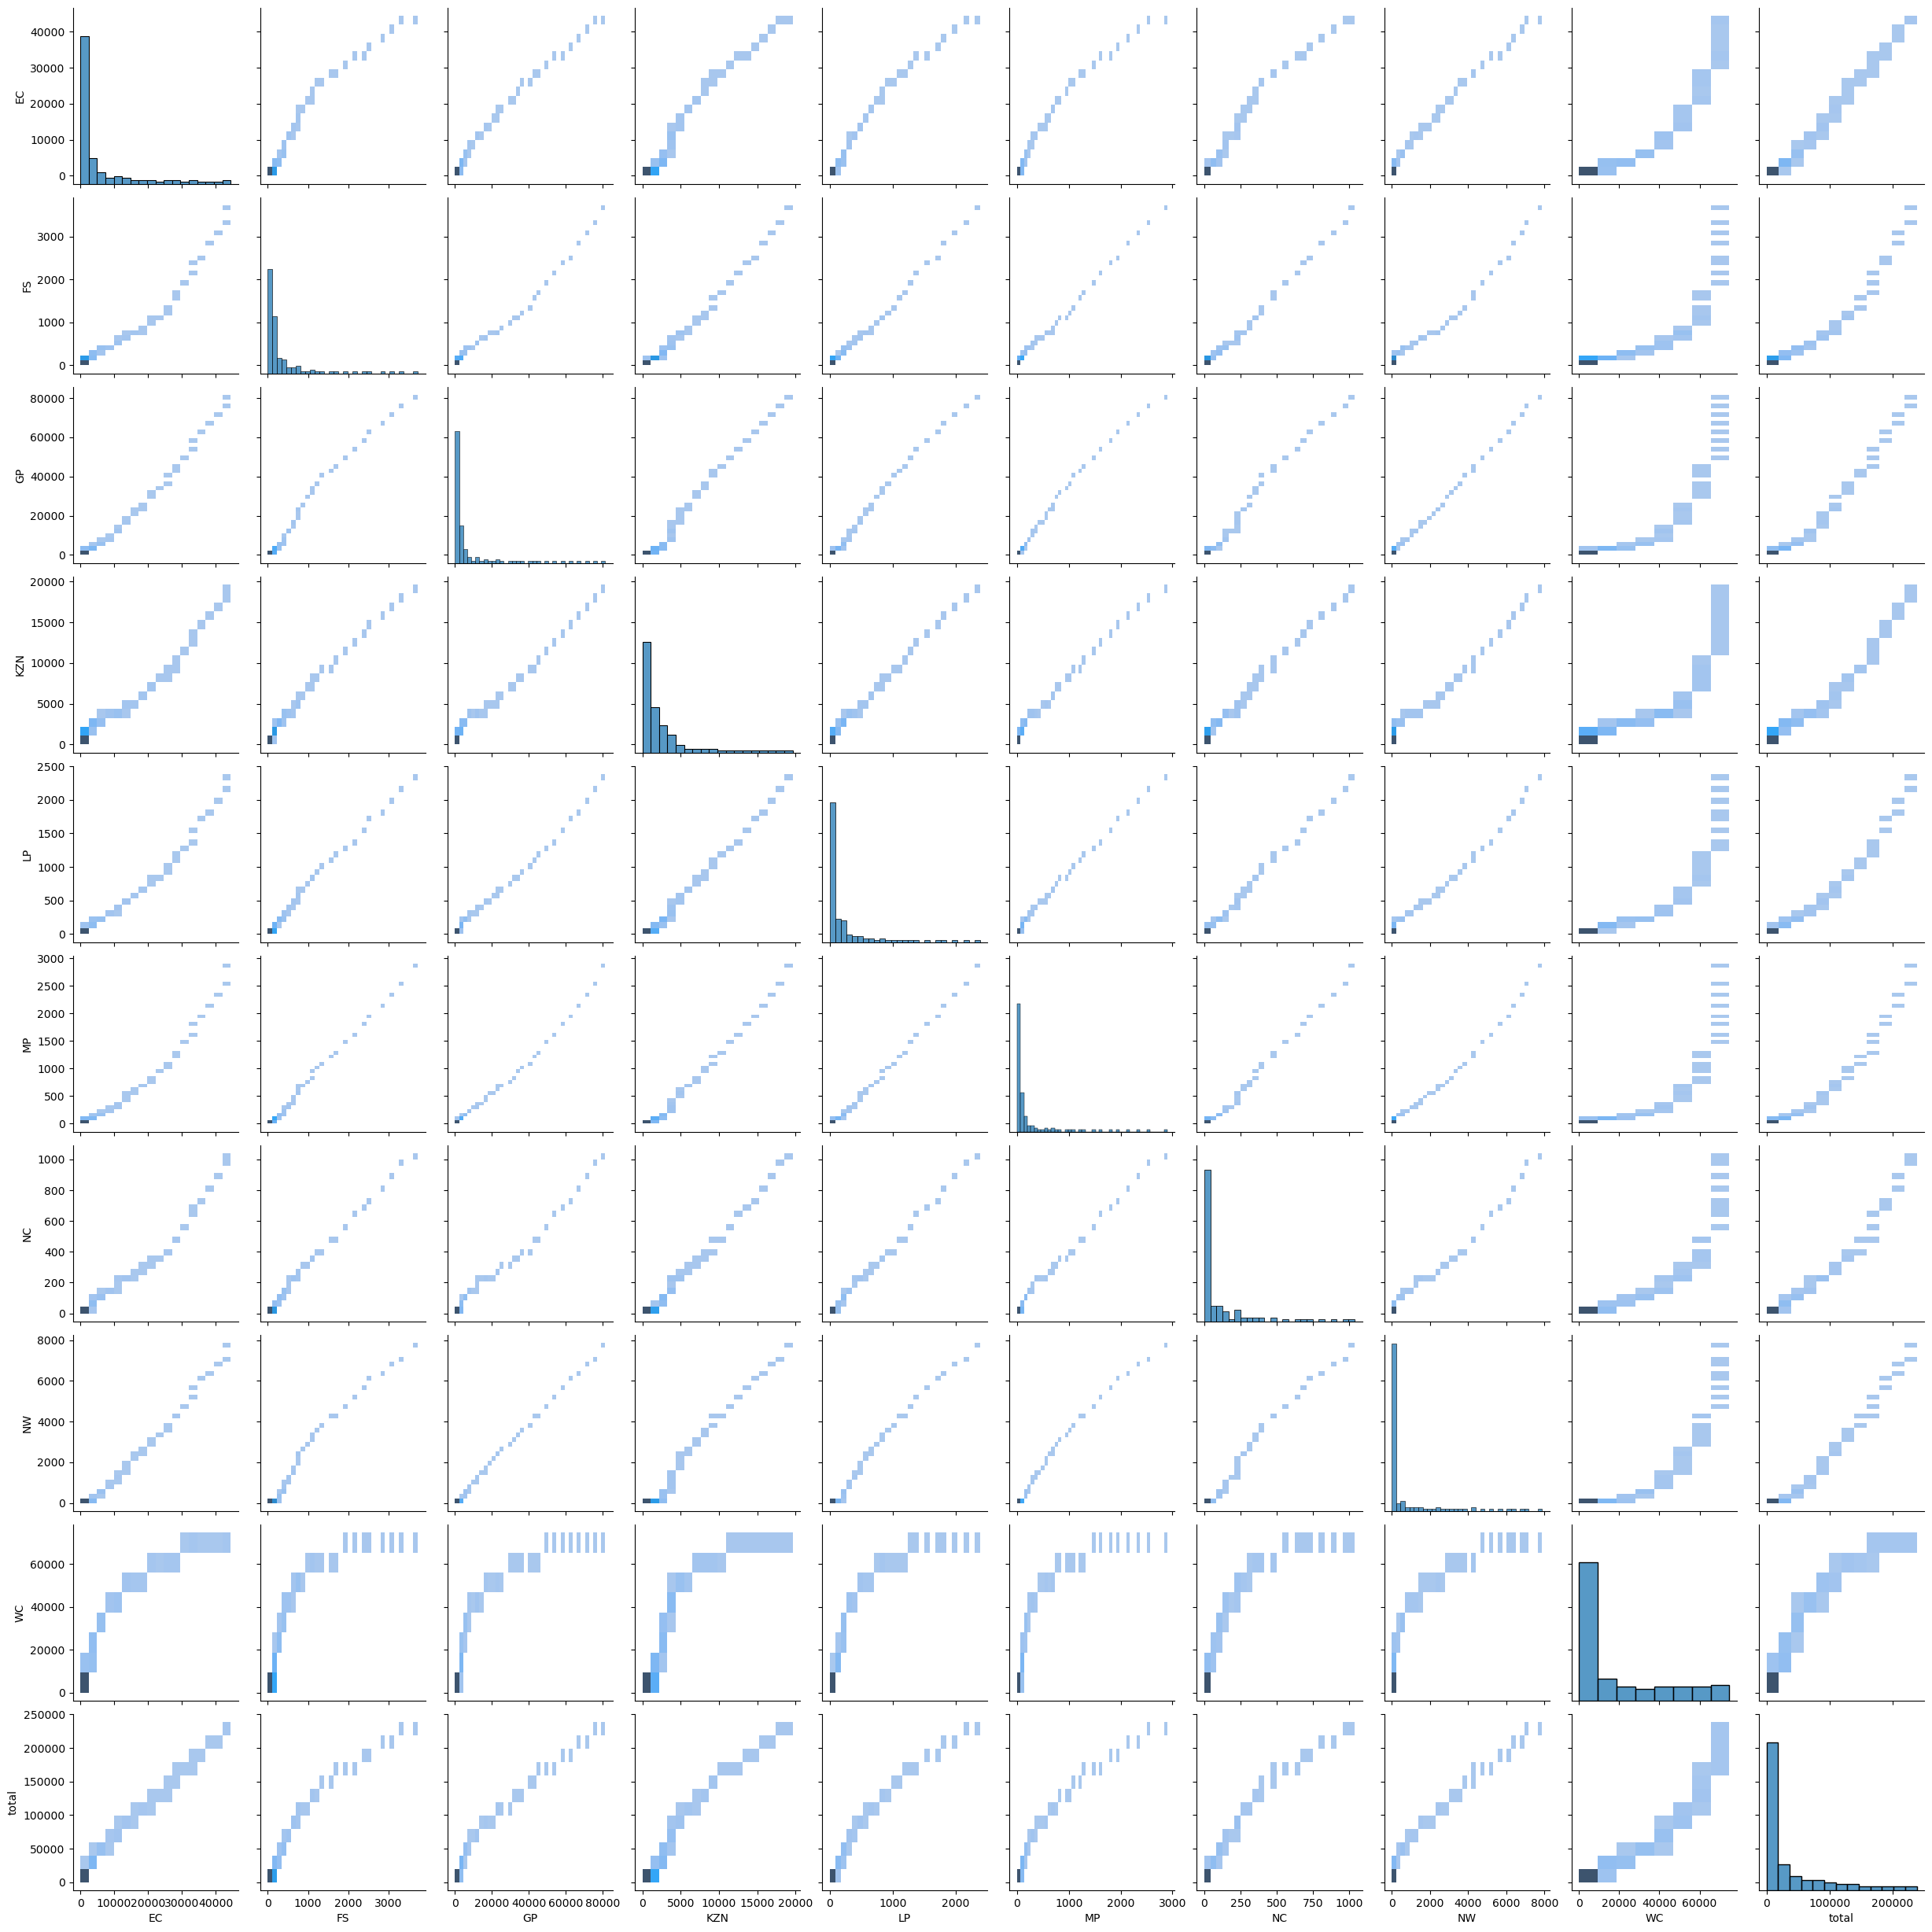

In [ ]:
sns.pairplot (cz.iloc[ : , :], kind='hist')

Correlation Analysis

Text(0.5, 1.0, 'Heatmap of correlation Matrix')

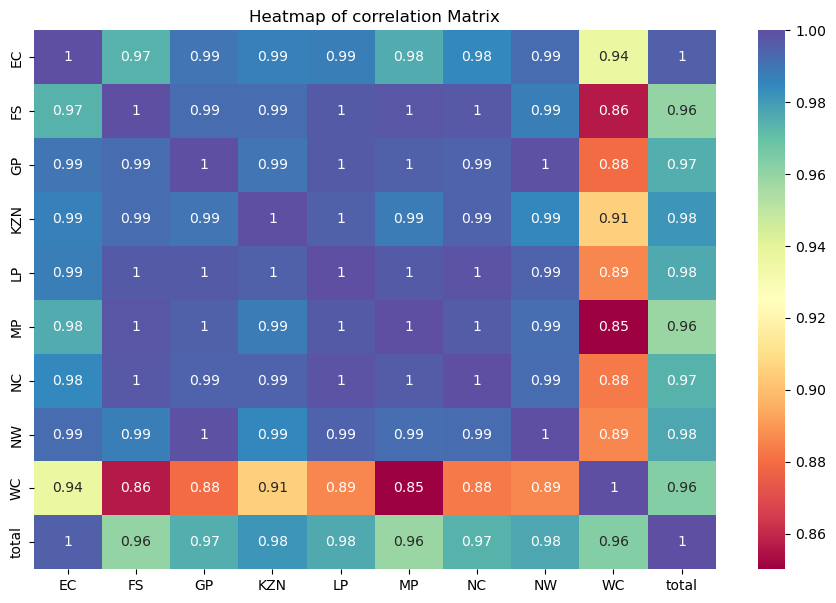

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(cz.corr (), annot=True, cmap='Spectral')
plt.title('Heatmap of correlation Matrix')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'MP'),
  Text(1, 0, 'FS'),
  Text(2, 0, 'WC'),
  Text(3, 0, 'NC'),
  Text(4, 0, 'GP'),
  Text(5, 0, 'LP'),
  Text(6, 0, 'NW'),
  Text(7, 0, 'KZN'),
  Text(8, 0, 'EC'),
  Text(9, 0, 'total')])

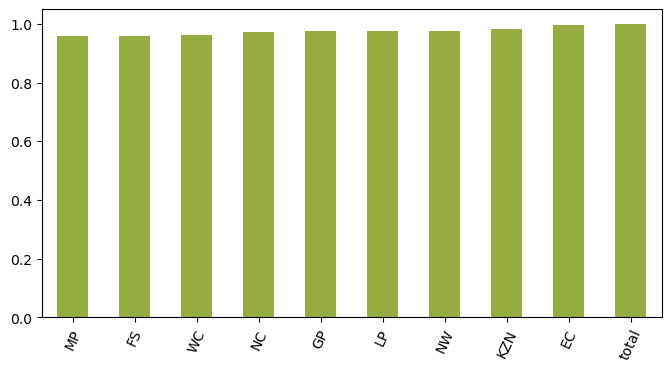

In [ ]:
cz.corrwith(cz['total']).sort_values().plot(kind='bar', color=palette[3],figsize=(8,4))
plt.xticks(rotation=65)

Observation
.Eastern Cape is directly correlated with the total deaths, Eastern Cape is more keenly to added more deaths to the overoll deaths toll (total).
.Free State is less correlated to contribute an impartful overall measure to the total deaths.
. Western Cape is consilidating in deaths, we might expect less deaths more recoveries as the months progress.
. KwaZuluNatal is keenly on the raise in deaths, we might epect more deaths.
. North Cape if deaths break above 1000 measure, deaths are to be expected to accumalete since it appears, North Cape is the lowest province per covid transmission rate. if transmission increase death rate will raise exponetionly.

Prediction model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

Feature Creation

In [ ]:
cz.columns

Index(['EC', 'FS', 'GP', 'KZN', 'LP', 'MP', 'NC', 'NW', 'WC', 'total'], dtype='object')

In [ ]:
def create_features(cz):
    """
    Create time series features based on time series index.
    """
    cz = cz.copy()
    cz['EC'] 
    cz['FS'] 
    cz['GP'] 
    cz['KZN']  
    cz['LP'] 
    cz['MP'] 
    cz['NC'] 
    cz['NW']
    cz['WC'] 
    return cz

cz = create_features(cz)

In [ ]:
train = cz.loc[cz.index <'26-05-2020']
test = cz.loc[cz.index >'26-05-2020']

In [ ]:
train = create_features(train)
test = create_features (test)

features = ['EC', 'FS', 'GP', 'KZN', 'LP', 'MP', 'NC', 'NW', 'WC']
target = 'total'


Create our model

In [ ]:
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[21:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:68399.78440	validation_1-rmse:78026.00733
[100]	validation_0-rmse:28420.93813	validation_1-rmse:32580.90858
[200]	validation_0-rmse:12251.41434	validation_1-rmse:15496.90523
[300]	validation_0-rmse:5569.72737	validation_1-rmse:8015.64788
[400]	validation_0-rmse:2740.03758	validation_1-rmse:5421.86532
[500]	validation_0-rmse:1484.47743	validation_1-rmse:4355.89101
[600]	validation_0-rmse:849.07891	validation_1-rmse:3925.22886
[700]	validation_0-rmse:501.08537	validation_1-rmse:3782.27004
[800]	validation_0-rmse:300.66954	validation_1-rmse:3722.40901
[900]	validation_0-rmse:183.27849	validation_1-rmse:3698.27291
[999]	validation_0-rmse:115.22773	validation_1-rmse:3687.61288


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

Feature importance

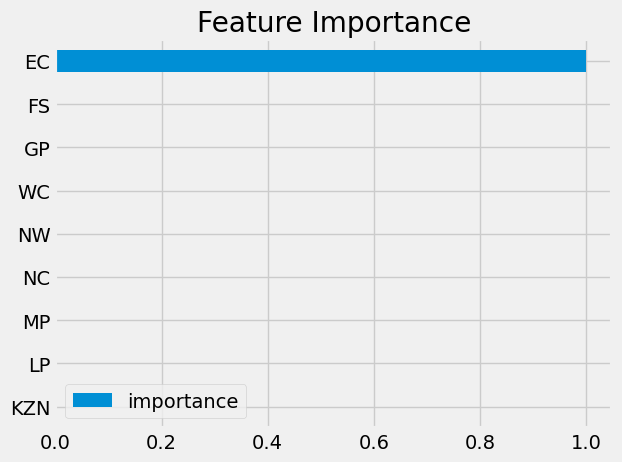

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

forecast on test

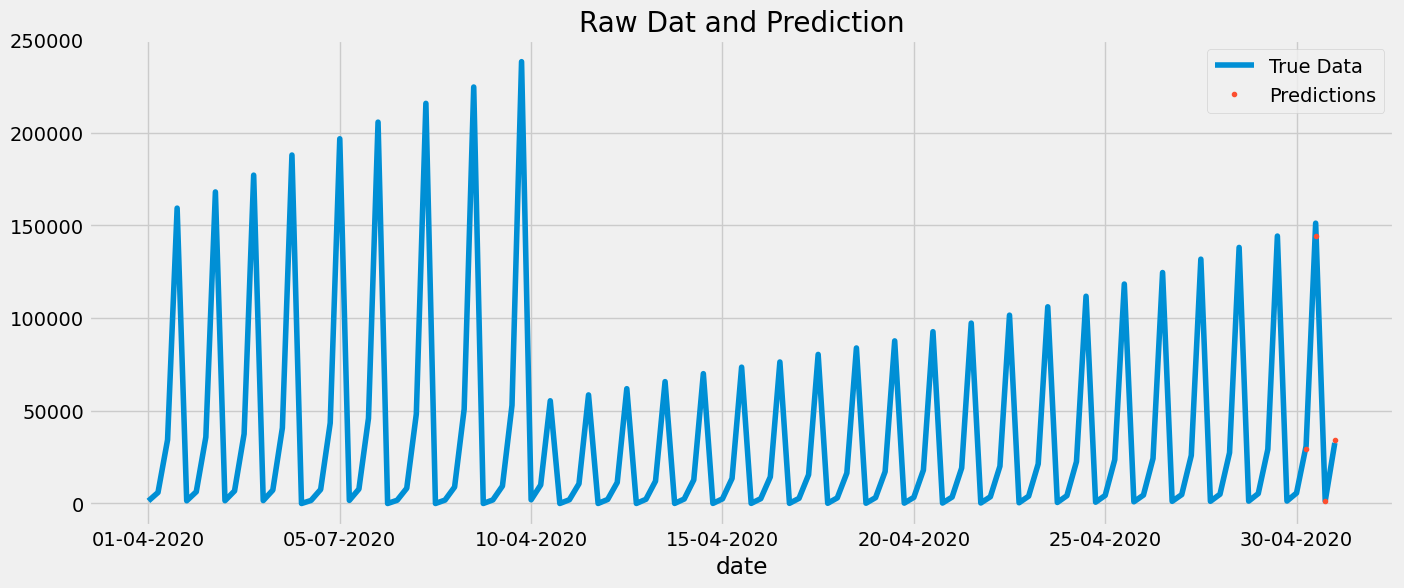

In [ ]:
test['prediction'] = reg.predict(X_test)
cz = cz.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = cz[['total']].plot(figsize=(15, 6))
cz['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

Score (RMSE)

In [ ]:
score = np.sqrt(mean_squared_error(test['total'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 3687.61


Calculate ERROR
Look at the worse and best predicted days

In [ ]:
test['error'] = np.abs(test[target] - test['prediction'])
test['total'] = test.total
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
30-06-2020    6971.984375
30-05-2020    1734.962891
31-05-2020    1665.789062
31-03-2020      20.918579
Name: error, dtype: float64

1. Cross Validation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit (n_splits= 5, test_size= 4*1, gap=1)
cz = cz.sort_index()

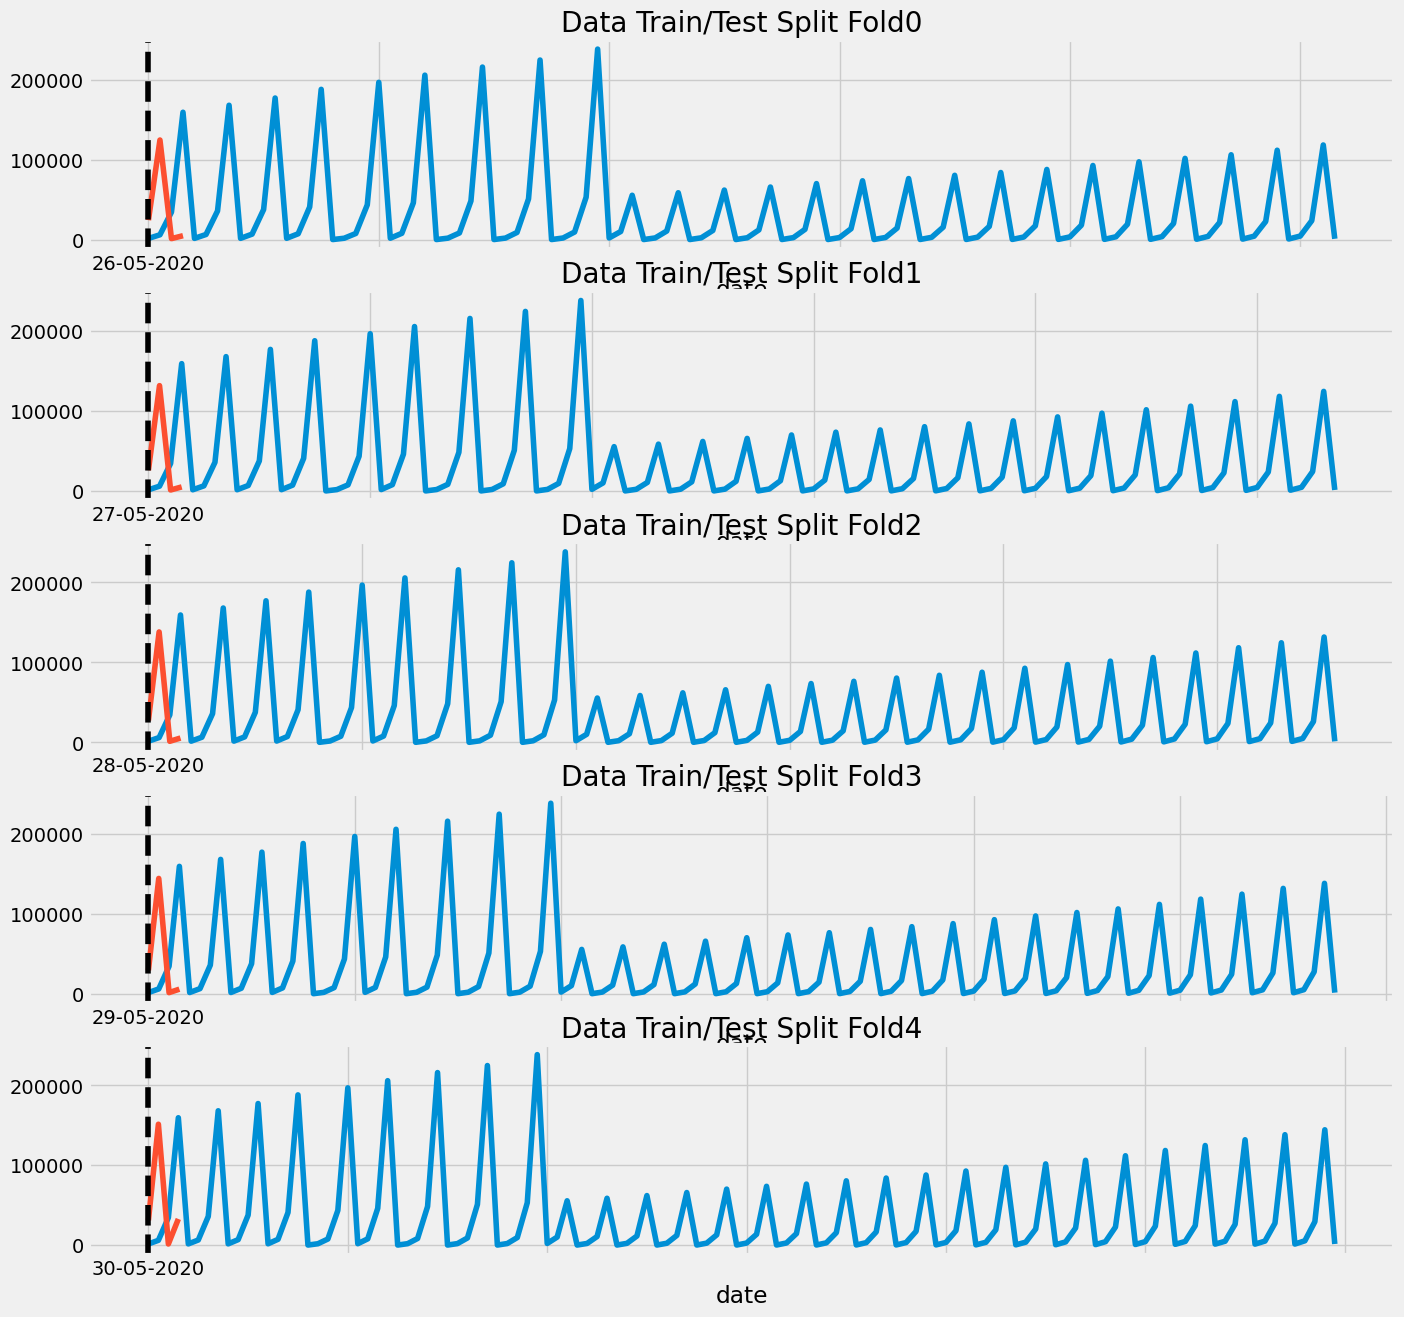

In [ ]:

fig, axs = plt.subplots(5, 1, figsize=(15, 15),
                                )

fold= 0
for train_idx, val_idx in tss.split(cz):
 train = cz.iloc[train_idx]
 test = cz.iloc[val_idx]
 train['total'].plot(ax=axs[fold], label='Training Set', title=f'Data Train/Test Split Fold{fold}')
 test['total'].plot(ax=axs[fold], label='Test Set')
 axs[fold].axvline(test.index.min(), color='black', ls='--')
 fold += 1
plt.show() 